#the sentiment analysis task.


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Load the IMDB dataset
max_features = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocess the data
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [4]:
# Build the RNN model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
batch_size = 64
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 93ms/step - accuracy: 0.5562 - loss: 0.6869 - val_accuracy: 0.6798 - val_loss: 0.5899
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.8185 - loss: 0.4150 - val_accuracy: 0.7822 - val_loss: 0.4508
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.8865 - loss: 0.2881 - val_accuracy: 0.7966 - val_loss: 0.4663
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.9085 - loss: 0.2409 - val_accuracy: 0.6568 - val_loss: 0.7166
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9046 - loss: 0.2398 - val_accuracy: 0.7216 - val_loss: 0.6726


In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

782/782 - 12s - 15ms/step - accuracy: 0.7267 - loss: 0.6550
Test Accuracy: 0.73


In [8]:
# Making predictions
sample_review = x_test[0]  # Use a sample review from the test set
prediction = model.predict(sample_review[np.newaxis, :])[0][0]
print(f"Sentiment Score: {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Sentiment Score: 0.66


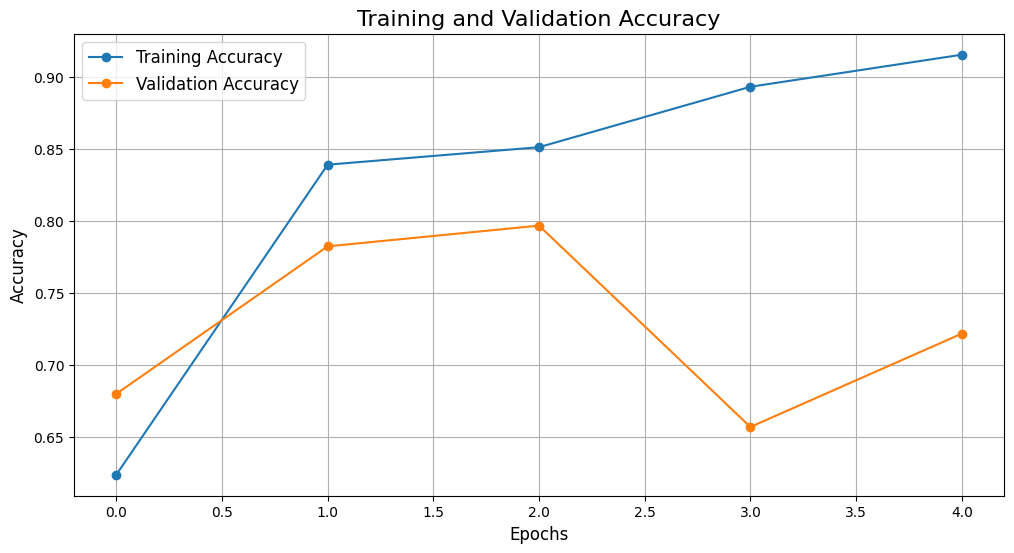

In [10]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

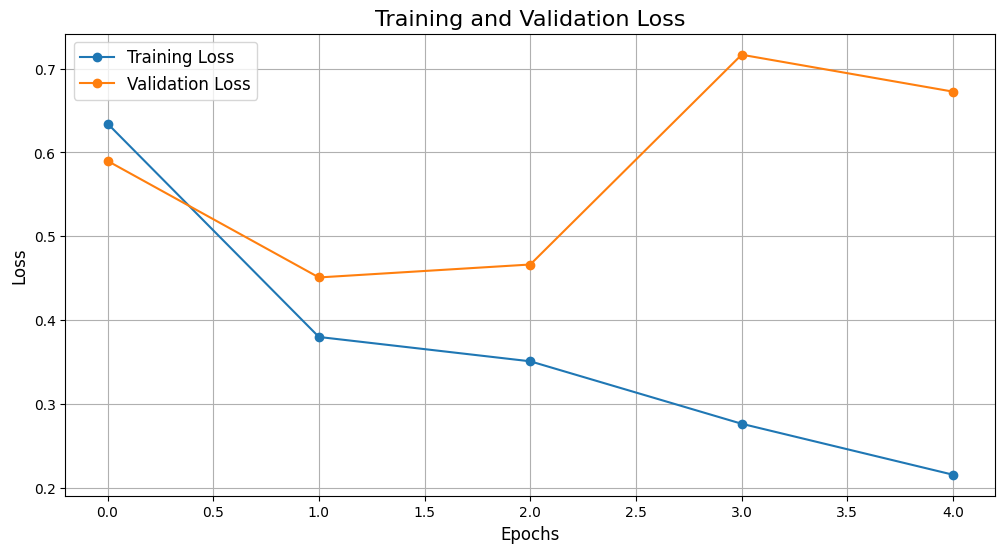

In [11]:
# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

#Test with Custom Reviews

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example custom review
custom_review = "The movie was fantastic! I really enjoyed it."

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_sequences(x_train)

custom_sequence = tokenizer.texts_to_sequences([custom_review])
custom_padded = pad_sequences(custom_sequence, maxlen=maxlen)

custom_prediction = model.predict(custom_padded)[0][0]
print(f"Custom Review Sentiment Score: {custom_prediction:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Custom Review Sentiment Score: 0.98
